## <b>Chapter 5.군집 분석(Cluster Analysis)</b>

- 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶은 것이다.
- 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법이다.
- 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류하는 것이다.

### 1. 텍스트 유사도(Text Similarity)

- 텍스트 유사도는 대표적으로 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도로 계산할 수 있다.
- 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용한다.
- 코사인 유사도(Cosine Similarity): 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 유사도 계산 방식이다.

#### 1) 자카드 유사도

<img src='images/jaccard1.png' width='300px'><img src='images/jaccard2.png' width='400px'>
  
- A, B 두개의 집합이 있다고 할 때, 합집합에서 교집합의 비율을 구함으로써 유사도를 계산 방식이다.

  ###### * 출처 : https://blog.naver.com/sw4r/222223674842

##### ① 데이터 입력

In [1]:
d1 = "The sky is blue"
d2 = "The sun is bright" 
d3 = "The sun in the sky is bright"

##### ② 자카드 유사도 함수 생성

In [2]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
def jaccard_similarity(d1, d2):
    lemmatizer = WordNetLemmatizer() 
    
    words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
    words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]
    inter = len(set(words1).intersection(set(words2))) 
    union = len(set(words1).union(set(words2))) 

    return inter/union 

##### ③ 자카드 유사도 계산

In [4]:
print(jaccard_similarity(d1,d2))
print(jaccard_similarity(d1,d3))
print(jaccard_similarity(d2,d3))

0.3333333333333333
0.42857142857142855
0.6666666666666666


#### 2) 코사인 유사도

<img src='images/cos.png' width='980px'>

- 두 벡터의 방향이 완전히 동일한 경우에는 1의 값을 가지며, 90°의 각일때 0, 반대방향이면 -1의 값을 가진다.
- 코사인 유사도는 -1 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단할 수 있다.

##### ① tf-idf vectorizer 객체 생성

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import numpy as np

tfidf = TfidfVectorizer()

##### ② tf-idf 계산

In [9]:
docs = np.array([d1,d2,d3])
tfidf_matrix = tfidf.fit_transform(docs)
print(tfidf_matrix)
print(tfidf_matrix.toarray())

  (0, 0)	0.6628399823470976
  (0, 3)	0.39148397136265967
  (0, 4)	0.5041068915759233
  (0, 6)	0.39148397136265967
  (1, 1)	0.5584778353707552
  (1, 5)	0.5584778353707552
  (1, 3)	0.4337078595086741
  (1, 6)	0.4337078595086741
  (2, 2)	0.472490644020669
  (2, 1)	0.3593413134382093
  (2, 5)	0.3593413134382093
  (2, 3)	0.2790605857810957
  (2, 4)	0.3593413134382093
  (2, 6)	0.5581211715621914
[[0.66283998 0.         0.         0.39148397 0.50410689 0.
  0.39148397]
 [0.         0.55847784 0.         0.43370786 0.         0.55847784
  0.43370786]
 [0.         0.35934131 0.47249064 0.27906059 0.35934131 0.35934131
  0.55812117]]


##### ③ 코사인 유사도 계산

- d1과 d1,d2,d3간 유사도

In [11]:
sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)
print(sim)

[[1.         0.33957935 0.50888967]]


- 각 문서간 유사도

In [12]:
sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(sim)

[[1.         0.33957935 0.50888967]
 [0.33957935 1.         0.76446063]
 [0.50888967 0.76446063 1.        ]]


- 다른 문서와 d1,d2,d3간 유사도

In [13]:
d5 = 'this is test'
test = tfidf.transform([d5])
sim = cosine_similarity(test, tfidf_matrix)
print(sim)

[[0.39148397 0.43370786 0.27906059]]


- 시각화

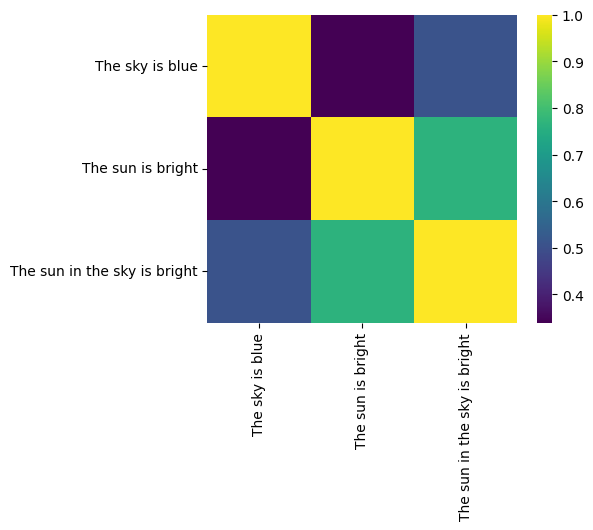

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
# print(sim)

map = sns.heatmap(sim, xticklabels=docs, yticklabels=docs, cmap='viridis')
map.figure.set_size_inches(5,4)
plt.show();

### 2. 군집화를 위한 데이터 전처리

- 네이버 영화 리뷰 데이터 : https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

- 리뷰 데이터 읽기

In [17]:
f = open('data_set/ratings.txt', 'r', encoding='utf-8') 
raw = f.readlines()
print(raw[:3])

['id\tdocument\tlabel\n', '8112052\t어릴때보고 지금다시봐도 재밌어요ㅋㅋ\t1\n', '8132799\t디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.\t1\n']


- 리뷰 데이터만 추출

In [18]:
reviews = []
for i in raw:
    reviews.append(i.split("\t")[1])

print(reviews[:5])

['document', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지']


- 'document' 제외

In [19]:
reviews = reviews[1:]
print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


- 형태소 분석 : 2차원 리스트로 명사만 추출

In [20]:
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
from tqdm import tqdm

kiwi = Kiwi()
stopwords = Stopwords()
reviews_token = []

for review in tqdm(reviews):
    token = kiwi.tokenize(review, stopwords=stopwords)
    review_token = []
    for t in token:
        if t.tag[0] == 'N': review_token.append(t.form)
    reviews_token.append(review_token)

100%|██████████| 200000/200000 [01:36<00:00, 2077.43it/s]


In [21]:
print(reviews_token[:5])

[[], ['디자인', '학생', '외국', '디자이너', '전통', '발전', '문화', '산업', '나라', '시절', '끝', '열정', '노라노', '전통', '저', '꿈', '감사'], ['폴리스', '스토리', '시리즈', '뉴', '하나', '최고'], ['연기', '개쩔', '거', '생각', '몰입', '진짜', '영화'], ['안개', '밤하늘', '초승달', '영화']]


### 3. Word2Vec 생성

* `Word2Vec` 모델을 생성한다.
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성한다.

##### ① word2vec 모델 생성

In [24]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

In [27]:
word2vec = Word2Vec(reviews_token, min_count=5)

##### ② 영화와 유사한 단어 추출

In [29]:
sim = word2vec.wv.most_similar('영화', topn=30)
print(sim)

[('독립', 0.6918767094612122), ('수작', 0.6903989911079407), ('왜캐', 0.6554484963417053), ('상업', 0.6469360589981079), ('포르노', 0.6202649474143982), ('공포물', 0.6200814843177795), ('사색', 0.6105401515960693), ('외국', 0.6056660413742065), ('예산', 0.6039360761642456), ('철학', 0.6036142706871033), ('선사', 0.5985875129699707), ('깽깽이', 0.5976419448852539), ('야동', 0.5939812660217285), ('따름', 0.5931739211082458), ('향수', 0.5914575457572937), ('무녀', 0.5912755727767944), ('저질', 0.5907258987426758), ('느와르', 0.5902554392814636), ('만큼', 0.589837372303009), ('매니아', 0.5897373557090759), ('근래', 0.5895196199417114), ('영상물', 0.5887032747268677), ('필름', 0.5878769755363464), ('재난', 0.5872781872749329), ('최초', 0.5859177708625793), ('감안', 0.5856412053108215), ('관객', 0.5854791402816772), ('싸구려', 0.5851873159408569), ('데미', 0.5844867825508118), ('경향', 0.5829750299453735)]


##### ③ t-sne을 이용한 단어 벡터 시각화

In [30]:
tsne = TSNE(n_components=2)


##### ④ 어휘간 유사도 계산

In [38]:
vocab = word2vec.wv.index_to_key
# vocab = word2vec.wv.vocab
vocab

['영화',
 '거',
 '점',
 '연기',
 '최고',
 '평점',
 '이거',
 '생각',
 '스토리',
 '드라마',
 '듯',
 '뭐',
 '감동',
 '배우',
 '내용',
 '재미',
 '감독',
 '시간',
 '쓰레기',
 '사랑',
 '번',
 '작품',
 '이것',
 '정도',
 '마지막',
 '액션',
 '편',
 '개',
 '분',
 '기대',
 '만',
 '장면',
 '하나',
 '처음',
 '끝',
 '최악',
 '줄',
 '돈',
 '이야기',
 '느낌',
 '저',
 '이해',
 '명작',
 '이상',
 '여자',
 '잼',
 '한국',
 '주인공',
 '기억',
 '연출',
 '애',
 '마음',
 '현실',
 '결말',
 '인생',
 '데',
 '남자',
 '공포',
 '전개',
 '소재',
 '짜증',
 '반전',
 '필요',
 '굿',
 '전',
 '씨',
 '수준',
 '눈물',
 '음악',
 '매력',
 '가슴',
 '일본',
 '속',
 '아이',
 '인간',
 '원작',
 '추천',
 '코미디',
 '급',
 '자체',
 '실망',
 '누구',
 '눈',
 '캐릭터',
 '뿐',
 '가족',
 '여운',
 '연기력',
 '모습',
 '짱',
 '개봉',
 '시리즈',
 '뻔',
 '표현',
 '공감',
 '극장',
 '부분',
 '몰입',
 '지금',
 '어디',
 '대사',
 '제목',
 '기분',
 '진심',
 '억지',
 '작가',
 '스릴러',
 '알바',
 '삶',
 '막장',
 '친구',
 '점수',
 '영상',
 '부족',
 '이유',
 '긴장감',
 '노래',
 '시작',
 '개인',
 '중간',
 '지',
 '후',
 '대',
 '나라',
 '의미',
 '물',
 '나름',
 '발',
 '당시',
 '박',
 '오랜만',
 '놈',
 '시대',
 '요즘',
 '터',
 '씬',
 '웃음',
 '감정',
 '그것',
 '세상',
 '신',
 '전쟁',
 '욕',
 '년대',
 '무엇',
 '적',
 '팬

In [33]:
similarity = word2vec.wv[vocab]
similarity

array([[-0.6150892 ,  0.3522803 ,  0.29121467, ..., -0.7899781 ,
         0.63304067,  0.00302834],
       [-0.11088875,  0.5038675 ,  0.28440604, ..., -0.3269081 ,
         0.6077059 , -0.31970635],
       [-1.0023224 ,  0.61667174, -0.13206849, ..., -0.7839932 ,
         0.58727825,  0.24577563],
       ...,
       [-0.01850049,  0.02232337,  0.03508751, ..., -0.03486353,
         0.02087504, -0.0033666 ],
       [-0.06792313,  0.06434474,  0.05151773, ..., -0.07024712,
         0.03175336,  0.0280801 ],
       [-0.01094481,  0.0140528 ,  0.01902563, ..., -0.04270552,
         0.03273416, -0.02090781]], dtype=float32)

In [35]:
similarity.ndim

2

In [36]:
similarity.shape

(11429, 100)

##### ⑤ 데이터 프레임으로 변환

In [39]:
import pandas as pd
transform_similarity = tsne.fit_transform(similarity)
transform_similarity

array([[ 76.10288  ,   2.2470603],
       [ 71.97479  ,  -8.027787 ],
       [ 61.341557 ,  20.20203  ],
       ...,
       [-90.68433  ,  -2.231672 ],
       [-48.604584 , -12.004537 ],
       [-88.12086  ,  -8.510821 ]], dtype=float32)

In [40]:
transform_similarity.shape

(11429, 2)

In [47]:
df = pd.DataFrame(transform_similarity, columns=['x','y'], index=vocab)
df[:10]

,x,y
영화,76.102882,2.247060
거,71.974792,-8.027787
점,61.341557,20.202030
연기,27.199677,51.278049
최고,62.697594,41.099144
평점,61.627140,20.213140
이거,62.822739,16.214716
생각,72.497887,-14.562476
스토리,88.738464,6.401089
드라마,70.469772,23.874155


##### ⑥ 시각화

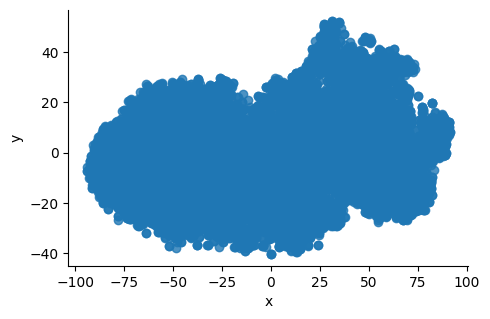

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
map = sns.lmplot(x='x', y='y', data=df)
map.figure.set_size_inches(5,3)
plt.show();

### 4. Scikit-learn을 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




- 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용하여 계층적 군집화 실습을 한다.    
- 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행한다.
- 계속 합쳐 나가더라도 언젠가는 종료해야 하는데, 병합 군집의 종료 조건에는 3가지를 지정 가능하다.
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합친다.(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합친다.
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합친다.
* `scikit-learn` 사용 예제에서는 3가지 종료 조건 간의 차이를 비교해 본다.

#### 1) ward :  Ward 연결법 (Ward Linkage Method) 이라고 함.
- 군집간의 거리에 따라 데이터들을 연결하기 보다는 군집내 편차들의 제곱합에 근거를 두고 군집들을 병합시키는 방법이다.
- 군집분석의 각 단계에서 데이터들을 하나의 군집으로 묶음으로써 생기는 정보의 손실을 군집의 평균과 데이터들 사이의 오차제곱합(SSE)으로 아래와 같이 측정한다

In [48]:
from sklearn.cluster import AgglomerativeClustering

##### ① ward 객체 생성

In [49]:
ward = AgglomerativeClustering(n_clusters=6, linkage='ward')

##### ② 어떤 클러스터에 속하는지 예측 연산

In [50]:
predict = ward.fit_predict(df)
print(predict)

[1 1 5 ... 2 2 2]


##### ③ 데이터 프레임으로 변환

In [51]:
result = df
result['predict'] = predict
result[:10]

,x,y,predict
영화,76.102882,2.247060,1
거,71.974792,-8.027787,1
점,61.341557,20.202030,5
연기,27.199677,51.278049,3
최고,62.697594,41.099144,5
평점,61.627140,20.213140,5
이거,62.822739,16.214716,5
생각,72.497887,-14.562476,1
스토리,88.738464,6.401089,5
드라마,70.469772,23.874155,5


##### ④ 시각화

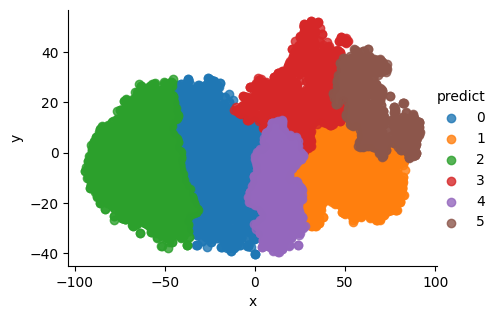

In [52]:
map = sns.lmplot(x='x', y='y', data=result, hue='predict', fit_reg=False)
map.figure.set_size_inches(5,3)
plt.show();

#### 2) average : 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합친다.

##### ① average 객체 생성

In [53]:
avg = AgglomerativeClustering(n_clusters=6, linkage="average")

##### ② 어떤 클러스터에 속하는지 예측 연산

In [54]:
predict = avg.fit_predict(df)
print(predict);

[2 2 3 ... 4 1 4]


##### ③ 데이터 프레임으로 변환

In [55]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
영화,76.102882,2.247060,2
거,71.974792,-8.027787,2
점,61.341557,20.202030,3
연기,27.199677,51.278049,3
최고,62.697594,41.099144,3
평점,61.627140,20.213140,3
이거,62.822739,16.214716,3
생각,72.497887,-14.562476,2
스토리,88.738464,6.401089,5
드라마,70.469772,23.874155,3


##### ④ 시각화

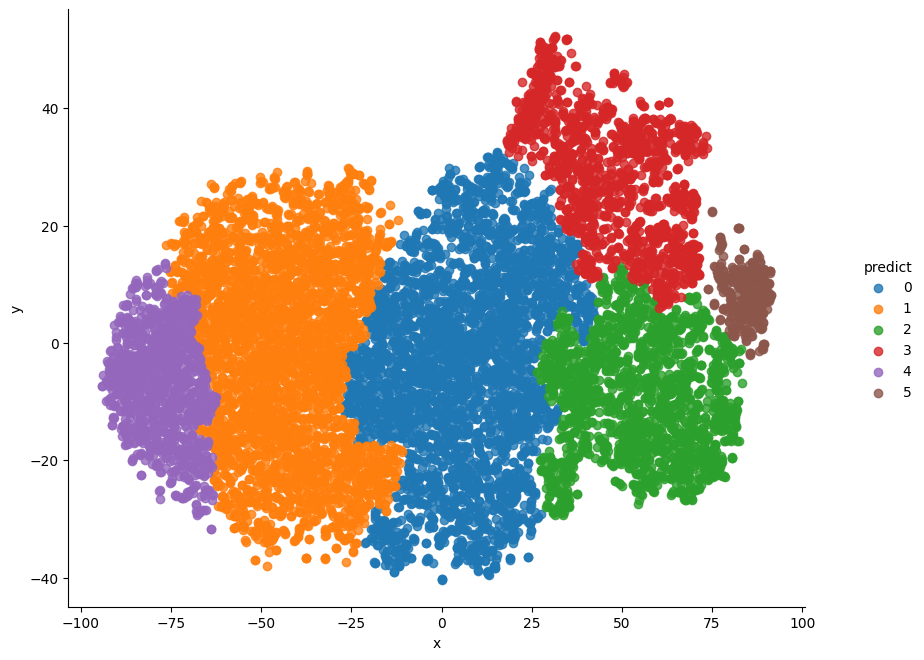

In [56]:
map = sns.lmplot(x='x', y='y', data=results, fit_reg=False, hue="predict")
map.figure.set_size_inches(10, 7)
plt.show();

#### 3) complete :  클러스터간 최대 거리가 가장 짧은 두 클러스터를 합친다.

##### ① complete 객체 생성

In [57]:
compl = AgglomerativeClustering(n_clusters=6, linkage="complete")

##### ② 어떤 클러스터에 속하는지 예측 연산

In [58]:
predict = compl.fit_predict(df)
print(predict)

[2 2 2 ... 3 0 3]


##### ③ 데이터 프레임으로 변환

In [59]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
영화,76.102882,2.247060,2
거,71.974792,-8.027787,2
점,61.341557,20.202030,2
연기,27.199677,51.278049,1
최고,62.697594,41.099144,1
평점,61.627140,20.213140,2
이거,62.822739,16.214716,2
생각,72.497887,-14.562476,2
스토리,88.738464,6.401089,2
드라마,70.469772,23.874155,1


##### ④ 시각화

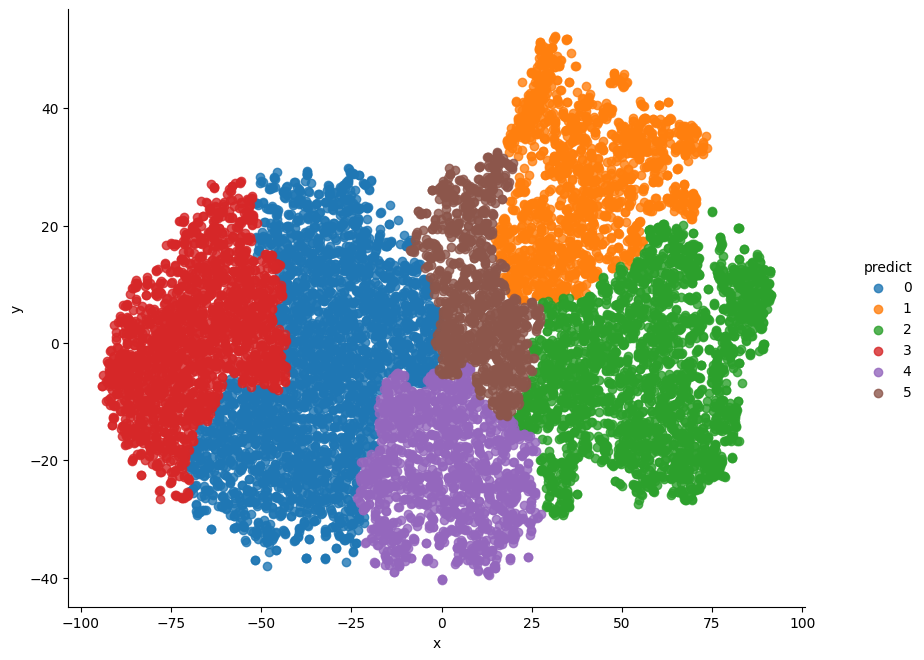

In [60]:
map = sns.lmplot(x='x', y='y', data=results, fit_reg=False, hue="predict")
map.figure.set_size_inches(10, 7)
plt.show();

### 5. Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

#### [K-Means 클러스터링 개념]
- 비지도 학습 알고리즘으로 사전에 클러스터 개수 k와 초기값을 입력하면 각 데이터의 그룹을 할당해 나가는 알고리즘

1. 일단 K개의 임의의 중심점(centroid)을 배치하고, 각 데이터들을 가장 가까운 중심점으로 할당한다. (일종의 군집을 형성한다.)

<img src='images/k-means1.png'><img src='images/k-means2.png'>

###### .................................<군집화 전 데이터 포인트들>.............................................................<군집수를 3개로 정하고 랜덤하게 군집 중심들 배치>

2.데이터 포인트들과 Centroid들 간 유클리드 거리를 계산하며 Centroid들의 위치를 계속 수정한다. 
- 각각의 데이터 포인트와 Centroid 간 유클리드 거리를 계산한다.
-  가장 짧은 거리의 Centroid로 데이터 포인트를 할당한다.

<img src='images/k-means3.png'>

###### ....<모든 데이터 포인트들을 가까운 군집(클러스터)에 할당>

- 데이터 포인트들의 배정이 끝난 후, Centroid들을 배정된 데이터 포인트의 평균값으로 이동시킨다.

<img src='images/k-means4.png'>

###### .....................................<Centroid 위치 변경 전>...................................................................<데이터 포인트들의 평균 값으로 Centroid 위치 변경 후>

- Centroid들이 더 이상 움직이지 않을 때까지 반복한다.

<img src='images/k-means5.png'><img src='images/k-means6.png'>

###### ....<변경된 Centroid 위치로 다시 거리를 계산하여 클러스터에 할당>.........................<Centroid 위치가 변경되지 않을 때까지 반복>

  ###### * 출처 : https://studying-haeung.tistory.com/6

#### 1) 클러스터 3개

##### ① KMeans 객체 생성

In [61]:
from sklearn.cluster import KMeans

In [62]:
kmeans = KMeans(n_clusters=3, n_init=10) 

##### ② 어떤 클러스트에 속하는지 클러스터 인덱스 번호 출력

In [63]:
predict = kmeans.fit_predict(df)
print(predict )

[1 1 1 ... 2 2 2]


##### ③ 데이터 프레임으로 변환

In [64]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
영화,76.102882,2.247060,1
거,71.974792,-8.027787,1
점,61.341557,20.202030,1
연기,27.199677,51.278049,1
최고,62.697594,41.099144,1
평점,61.627140,20.213140,1
이거,62.822739,16.214716,1
생각,72.497887,-14.562476,1
스토리,88.738464,6.401089,1
드라마,70.469772,23.874155,1


##### ④ 시각화

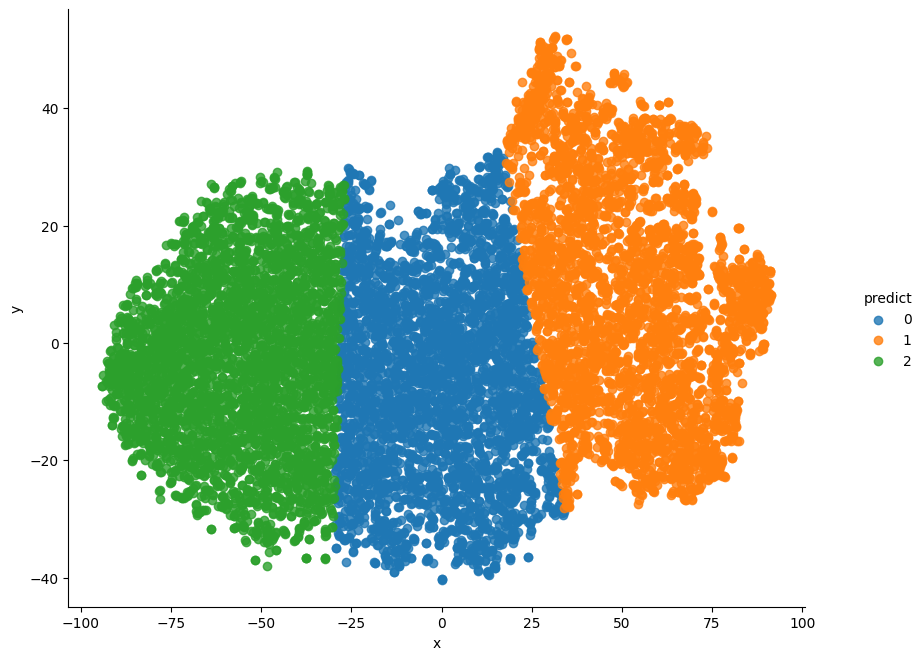

In [65]:
map = sns.lmplot(x='x', y='y', data = results, fit_reg = False, hue = "predict")
map.figure.set_size_inches(10, 7)
plt.show();

#### 2) 클러스터 6개

##### ① KMeans 객체 생성

In [ ]:
kmeans = KMeans(n_clusters=6, n_init=10)

##### ② 어떤 클러스트에 속하는지 클러스터 인덱스 번호 출력

In [ ]:
predict = kmeans.fit_predict(df)
print(predict )

##### ③ 데이터 프레임으로 변환

In [ ]:
results = df
results['predict'] = predict
results[0:10]

##### ④ 시각화

In [ ]:
map = sns.lmplot(x='x', y='y', data = results, fit_reg = False, hue = "predict")
map.figure.set_size_inches(10, 7)
plt.show()